Results for k = 1:
Confusion Matrix:
[[53  5]
 [ 4 18]]
Accuracy Score: 0.8875
-------------------------------------


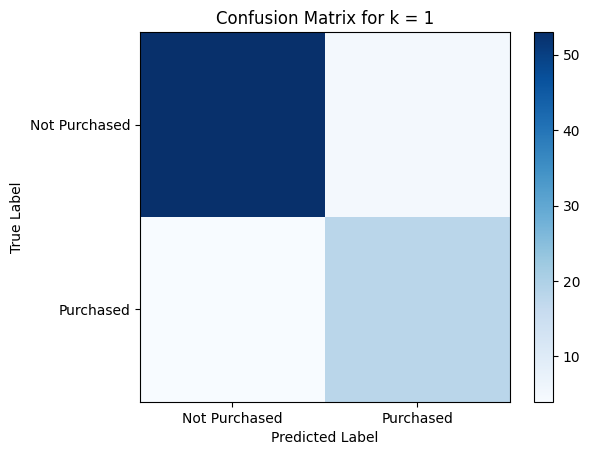

Results for k = 3:
Confusion Matrix:
[[55  3]
 [ 1 21]]
Accuracy Score: 0.95
-------------------------------------


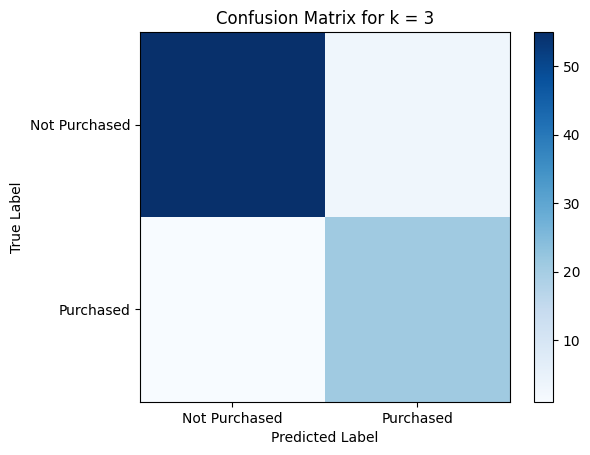

Results for k = 5:
Confusion Matrix:
[[55  3]
 [ 1 21]]
Accuracy Score: 0.95
-------------------------------------


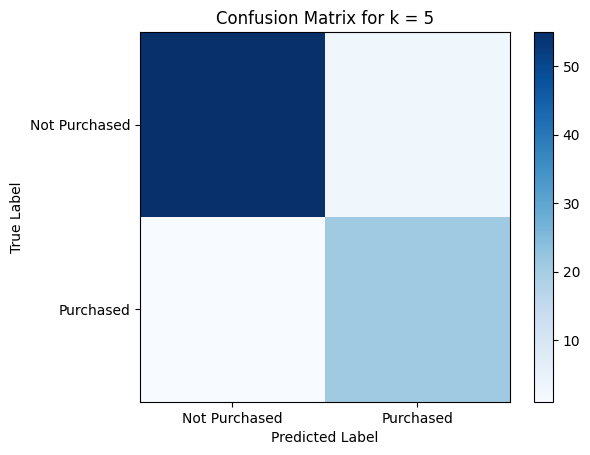

Results for k = 7:
Confusion Matrix:
[[55  3]
 [ 1 21]]
Accuracy Score: 0.95
-------------------------------------


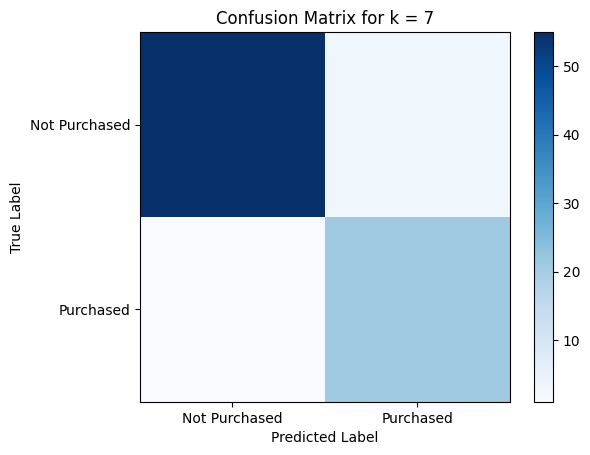

Results for k = 9:
Confusion Matrix:
[[55  3]
 [ 1 21]]
Accuracy Score: 0.95
-------------------------------------


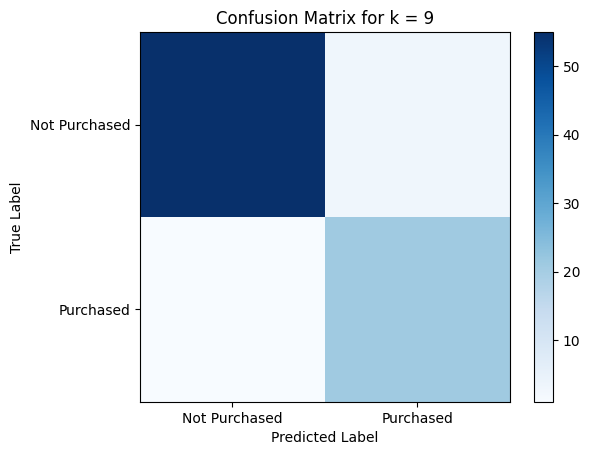

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Perform K-NN classification for different values of k
k_values = [1, 3, 5, 7, 9]
results = []

for k in k_values:
    # Training the K-NN model on the Training set
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    results.append((k, cm, accuracy))

# Print the results for each value of k
for result in results:
    k, cm, accuracy = result
    print(f"Results for k = {k}:")
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy Score:", accuracy)
    print("-------------------------------------")

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for k = {k}")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Not Purchased', 'Purchased'])
    plt.yticks(tick_marks, ['Not Purchased', 'Purchased'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
